In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [ ]:
directorio="https://raw.githubusercontent.com/cagomezv/Electiva_ML/main/"   #Direccion de acceso a GitHub
base_data_mensual="housing_in_london_monthly_variables.csv"       #Acceso a archivo de base de datos 1
base_data_anual="housing_in_london_yearly_variables.csv"          #Acceso a archivo de base de datos 2
df1=pd.read_csv(directorio+base_data_mensual)                     #Carga de base de datos a dataframe
df2=pd.read_csv(directorio+base_data_anual)
df2=df2.filter(items=["median_salary","area","date"])           #Extraer tres caracteristicas del df2

data=pd.merge(df1,df2)            #Unir los dos dataframe
data    #Mostrara primeros 5 registros de el dataframe denominado data.

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,median_salary
0,1999-12-01,city of london,169309,E09000001,97.0,NaN,1,"33,020.0"
1,2000-12-01,city of london,314772,E09000001,33.0,NaN,1,"34,903.0"
2,2001-12-01,city of london,362204,E09000001,17.0,0.0,1,"39,104.0"
3,2002-12-01,city of london,262197,E09000001,44.0,0.0,1,"39,750.0"
4,2003-12-01,city of london,305556,E09000001,38.0,0.0,1,"41,795.0"
...,...,...,...,...,...,...,...,...
898,2015-12-01,england,219582,E92000001,"80,366.0",NaN,0,"27,841.0"
899,2016-12-01,england,231922,E92000001,"79,605.0",NaN,0,"28,496.0"
900,2017-12-01,england,242378,E92000001,"76,522.0",NaN,0,"29,083.0"
901,2018-12-01,england,246518,E92000001,"69,456.0",NaN,0,"29,856.0"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           903 non-null    object 
 1   area           903 non-null    object 
 2   average_price  903 non-null    int64  
 3   code           903 non-null    object 
 4   houses_sold    860 non-null    float64
 5   no_of_crimes   617 non-null    float64
 6   borough_flag   903 non-null    int64  
 7   median_salary  881 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 63.5+ KB


In [ ]:
data["area"].value_counts()

city of london            21
westminster               21
newham                    21
redbridge                 21
richmond upon thames      21
southwark                 21
sutton                    21
tower hamlets             21
waltham forest            21
wandsworth                21
inner london              21
lewisham                  21
outer london              21
north east                21
north west                21
east midlands             21
west midlands             21
london                    21
south east                21
south west                21
merton                    21
lambeth                   21
barking and dagenham      21
greenwich                 21
barnet                    21
bexley                    21
brent                     21
bromley                   21
camden                    21
croydon                   21
ealing                    21
enfield                   21
hackney                   21
kingston upon thames      21
hammersmith an

In [ ]:
pd.options.display.float_format='{:,.1f}'.format
data.describe()

,average_price,houses_sold,no_of_crimes,borough_flag,median_salary
count,903.0,860.0,617.0,903.0,881.0
mean,"309,916.9","3,853.3","2,038.1",0.8,"28,789.3"
std,"187,527.4","12,917.7",879.5,0.4,"6,508.3"
min,"48,298.0",6.0,0.0,0.0,"15,684.0"
25%,"189,287.0",246.0,"1,542.0",1.0,"24,582.0"
50%,"260,893.0",351.0,"2,008.0",1.0,"28,284.0"
75%,"387,597.0",626.0,"2,402.0",1.0,"31,589.0"
max,"1,364,185.0","119,458.0","7,461.0",1.0,"61,636.0"


Los datos s de de d dkajd kljfjasfd kjfksamfd sdf,mnsdldfsdmfmnd interpretacion de los datos 

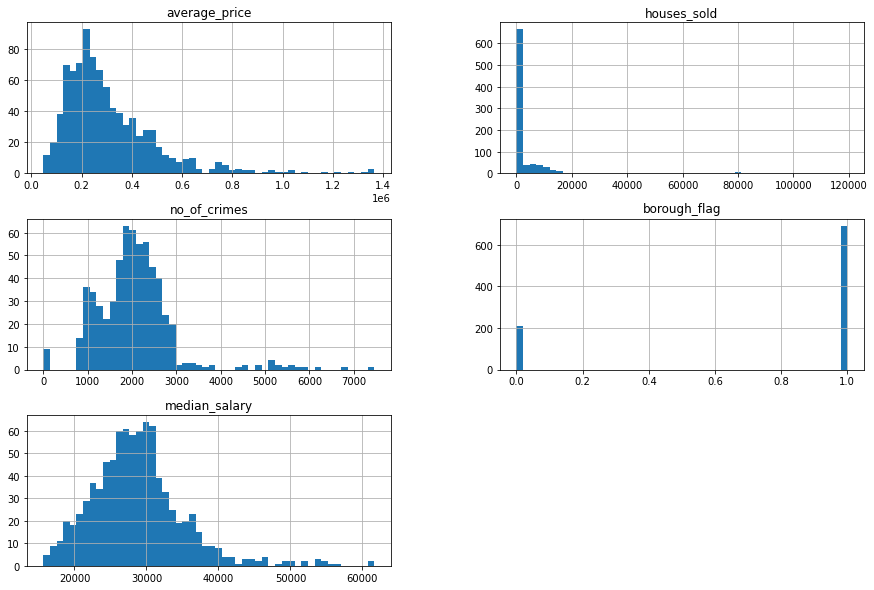

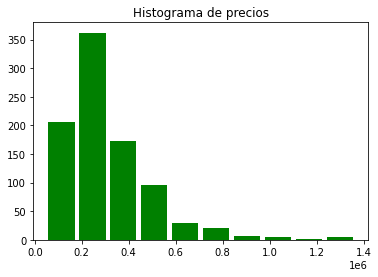

In [ ]:
#Histograma basico
data.hist(bins=50,figsize=(15,10))
plt.show()


#Histograma mas elaborado con matplotlib
plt.hist(x=data["average_price"],color='green', rwidth=0.85)
plt.title("Histograma de precios")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
set_ent,set_prueba =train_test_split(data, test_size=0.3,random_state=45)



632 271


In [ ]:
# Adicionar una columna donde puede categorizar los salarios.

data["salary_cat"]=pd.cut(data["median_salary"],bins=[0.,10000,20000,30000,40000,np.inf], labels=[1,2,3,4,5])

<AxesSubplot:>

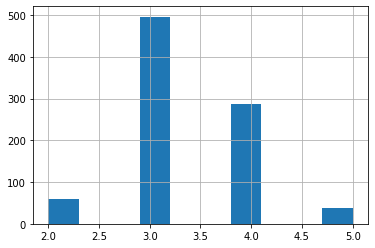

In [ ]:
data["salary_cat"].hist()

In [ ]:
data["salary_cat"].value_counts()

3    496
4    287
2     59
5     39
1      0
Name: salary_cat, dtype: int64

<AxesSubplot:>

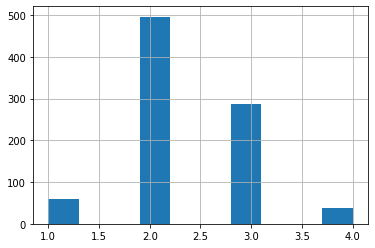

In [ ]:
data=data.dropna(subset=["median_salary"])
data=data.reset_index()
data["salary_cat"]=pd.cut(data["median_salary"],bins=[10000,20000,30000,40000,np.inf], labels=[1,2,3,4])
data["salary_cat"].hist()


In [ ]:
data["salary_cat"].value_counts()

2    496
3    287
1     59
4     39
Name: salary_cat, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=45)

for ent_index, prueba_index in split.split(data,data["salary_cat"]):
  cat_set_ent=data.loc[ent_index]
  cat_set_prueba=data.loc[prueba_index]

In [ ]:
cat_set_prueba["salary_cat"].value_counts()

2    149
3     86
1     18
4     12
Name: salary_cat, dtype: int64